In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)

In [2]:
df=pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge_cleaned1.csv")
df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'blood_pressure'}>,
        <AxesSubplot:title={'center':'insulin_test'}>,
        <AxesSubplot:title={'center':'liver_stress_test'}>],
       [<AxesSubplot:title={'center':'cardio_stress_test'}>,
        <AxesSubplot:title={'center':'years_smoking'}>,
        <AxesSubplot:title={'center':'zeta_disease'}>]], dtype=object)

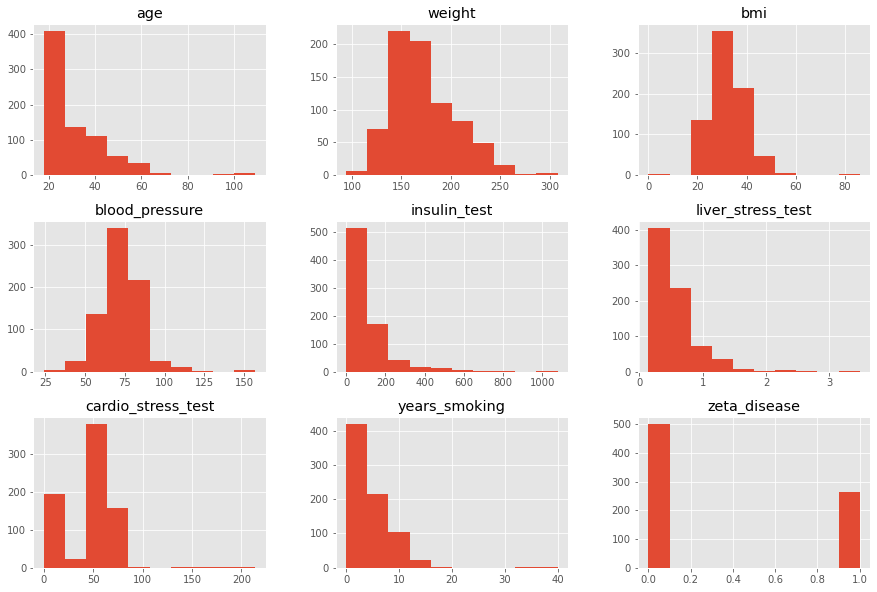

In [3]:
# Blood Pressure can't be 0 so removing the rows where 0 is answered
df = df[df.blood_pressure != 0]
# Few cases years_smoking is greater than age that can't be possible so removing those rows as well
age = df[df['years_smoking'] > df['age']].index
df.drop(age , inplace=True)

df.hist()

In [4]:
labels=['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease']

age
count    763.000000
mean      31.166448
std       13.970623
min       18.000000
25%       21.000000
50%       26.000000
75%       38.000000
max      109.000000
Name: age, dtype: float64
[ 54  23  47  18  24  49  20  37  21  19  25  29  46  39  22  50  27  67
  55  66  42  57  48  35  31  33  34  56 104  30  63 109  43  28  44  58
  26  41  51  45  32  52  60  99  38  64  40  36  62 102  53  59  61  65
  78]


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


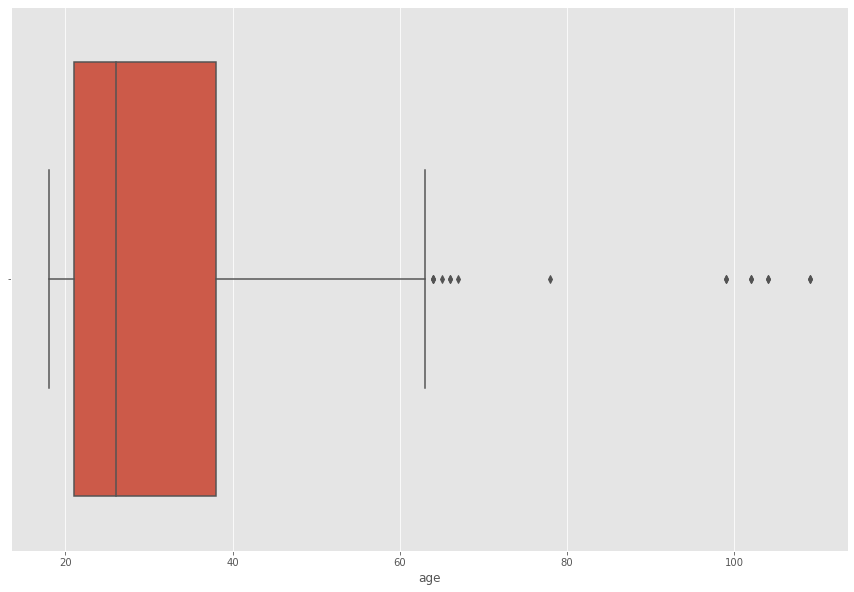

weight
count    763.000000
mean     172.663172
std       32.161144
min       94.000000
25%      150.000000
50%      167.000000
75%      193.000000
max      308.000000
Name: weight, dtype: float64
[189 150 186 160 158 154 167 162 177 172 149 175 199 169 152 195 123 161
 130 233 215 190 229 198 225 143 173 125 159 156 205 145 137 214 204 244
 187 131 197 179 208 141 139 176 117 153 192 180 292 118 240 174 178 226
 136 194 247 142 138 155 243 203 151 231 193 184 196 133 200 170 127 191
 201 213 245 140 164 230 146 166 157 183 147 128 135 211 246 171 206 121
 168 144 216 212 165 295 234 218 181 202 112 163 220 223 182 188 148 236
 106 207 124 132 115 126 129 134 224 228 107 237 221 209 111 122 238 185
 217 283 241 239  94 308 249 232 219 248 210 222 227]


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


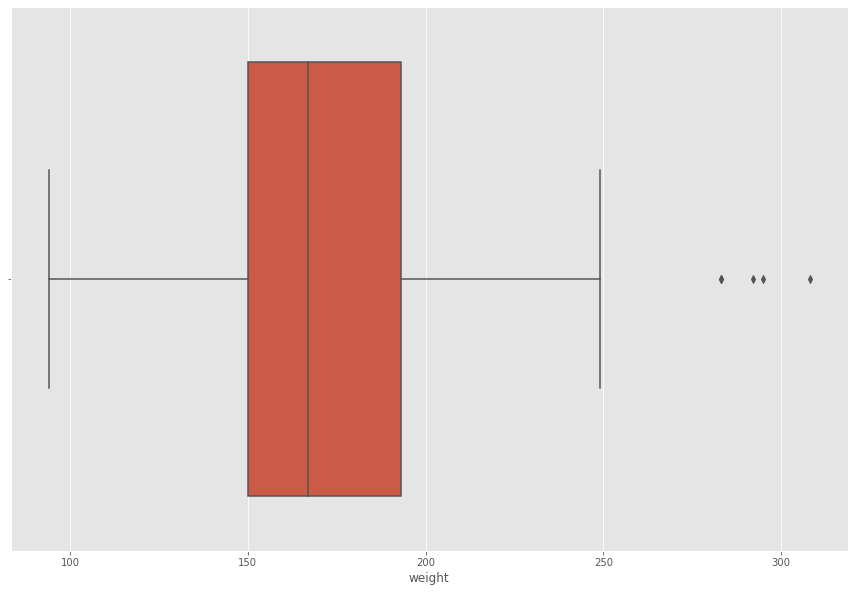

bmi
count    763.000000
mean      32.525426
std        8.027705
min        0.000000
25%       27.400000
50%       32.400000
75%       36.600000
max       86.100000
Name: bmi, dtype: float64
[27.1 38.5 29.9 30.8 32.4 27.  27.8 34.5 34.8 31.2 36.8 29.  27.6 29.3
 35.5 45.5 30.3 26.8 24.  25.6 26.  19.1 32.5 23.3 23.6  0.  30.4 32.7
 34.2 37.6 33.6 38.  32.  33.3 26.6 25.9 31.3 23.5 33.2 23.  28.3 34.9
 36.4 30.5 31.6 29.5 28.7 28.1 30.7 45.3 39.1 30.1 28.8 23.1 33.1 32.8
 67.1 29.6 35.4 37.2 33.8 40.5 33.7 36.3 30.2 80.7 18.4 24.7 30.9 26.5
 23.9 36.  34.4 39.5 40.6 22.5 26.4 24.6 19.6 39.4 40.  42.4 25.2 32.2
 32.1 35.2 42.3 22.3 35.8 42.1 27.3 40.9 25.1 27.4 36.5 22.4 29.8 27.5
 28.4 27.7 32.3 41.5 24.4 40.8 35.  37.7 25.3 18.2 42.8 25.5 39.8 26.1
 22.9 21.1 29.7 36.2 46.2 34.3 24.8 20.4 19.9 43.5 20.8 25.8 26.2 47.9
 48.8 24.2 37.8 24.3 21.  34.6 27.2 23.2 49.7 39.3 19.5 40.7 32.9 42.
 41.8 35.1 22.6 28.9 28.  21.8 42.6 44.  34.  32.6 34.7 41.3 31.  86.1
 49.6 37.3 41.2 36.6 44.1 23.8

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


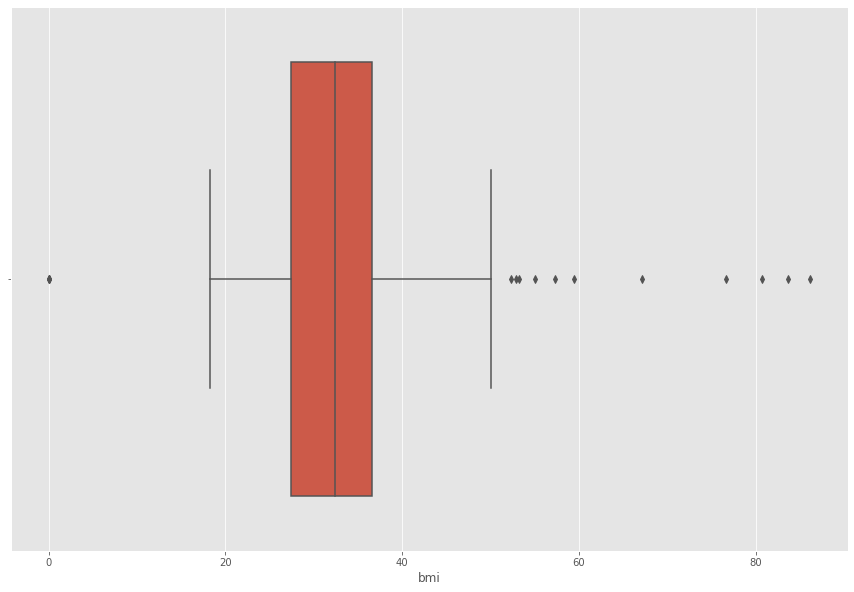

blood_pressure
count    763.000000
mean      72.752294
std       13.472933
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      157.000000
Name: blood_pressure, dtype: float64
[ 80  68  90  70  74  64  88  78  44  86  60  62  54  55  82  72  94  95
  84 148  58  92  75  96  66  76 110 106  48  46  56  65  52 122 157  50
  85  38 114 108  98 102 100  30 150  40  61 104  24 146]


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


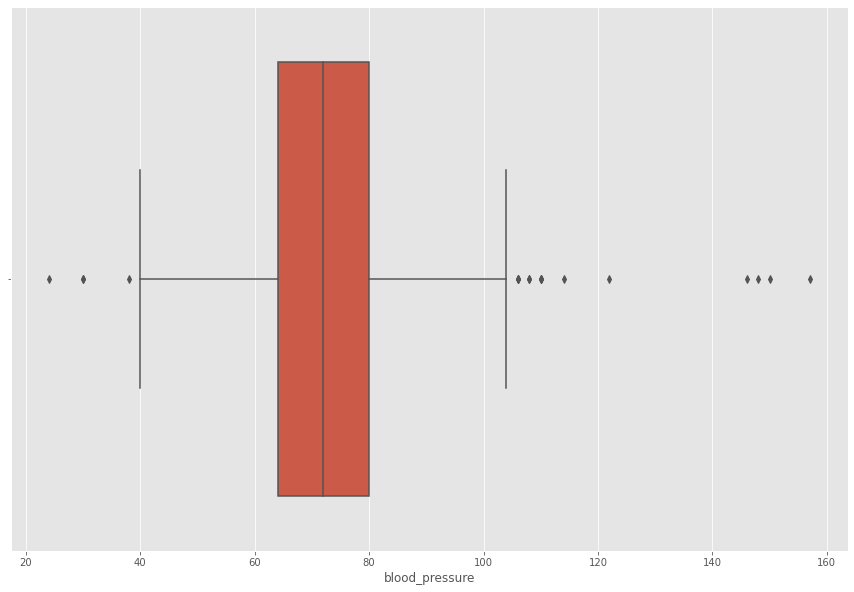

insulin_test
count     763.000000
mean       89.580603
std       127.805431
min         0.000000
25%         0.000000
50%        52.000000
75%       135.000000
max      1077.000000
Name: insulin_test, dtype: float64
[   0   71 1033  125  116  145  132  155  127   63  120  165  182   86
  237  160  176  135   96   73   52  126   40  130  293   44   94  215
  190   88   22  105   49  402   75   90  140  194  300  543   64  100
  191   83  485  115   38  310   53   50  150   42   70  210  148  114
  205   99   59   66   37   78  275  142  291   23   54  158  278   76
  326  370  175   85  112   68  255   36  335   32  478  220  235   41
  480  258  271  156  166   92  171  360  284   18   74  330  110   58
   48   65  122  168  495  152   79  196  185   72  167  270  225   60
   67  744  180  192  285   45   57  184  680  325  265  545   55   29
   87   56  228  106  342  304   16  415  240  440  128  249  465  474
   77  178  207  540   14  170  600  277  159  321  231   81   95  387
  1

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


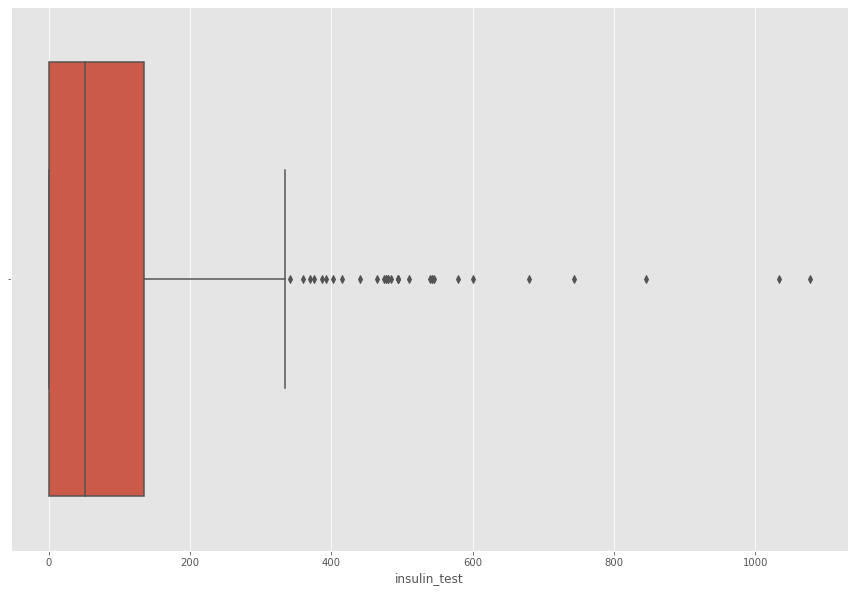

liver_stress_test
count    763.000000
mean       0.548238
std        0.352131
min        0.140800
25%        0.309300
50%        0.451800
75%        0.702800
max        3.481300
Name: liver_stress_test, dtype: float64
[1.5038 0.3868 0.2728 0.6598 0.7608 0.3218 0.5168 0.4658 0.2798 1.2448
 0.6608 0.4028 0.2658 0.6278 0.4118 0.3428 0.1898 0.8338 0.3308 0.2008
 0.2168 0.3548 0.3208 0.2978 0.7348 0.9028 0.7028 0.3648 0.7968 0.2268
 1.0638 0.2748 0.7368 0.5058 0.3258 0.9178 0.2048 0.4958 0.7358 0.2288
 0.8938 0.4008 0.1918 0.2328 0.3458 0.3168 0.3228 0.4478 1.0308 1.0178
 0.8678 0.4928 0.6638 0.4968 0.2198 0.2298 0.5828 0.2568 0.4068 0.7498
 0.3768 0.5088 0.3278 0.3818 0.5018 0.3138 0.3478 0.3408 0.4648 0.3448
 0.5718 0.3008 0.1508 0.6758 0.5298 0.4268 0.3498 0.2208 0.6448 0.1928
 0.8238 0.3588 0.4698 0.6088 0.5908 0.7738 0.7168 0.3488 0.3038 0.4798
 0.2818 0.5748 0.2998 0.3148 0.3968 0.2378 1.3208 1.1388 0.1628 0.2918
 0.3758 0.6048 1.8438 0.5598 0.6748 0.7548 0.8478 0.1838 0.2238 0.2678
 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


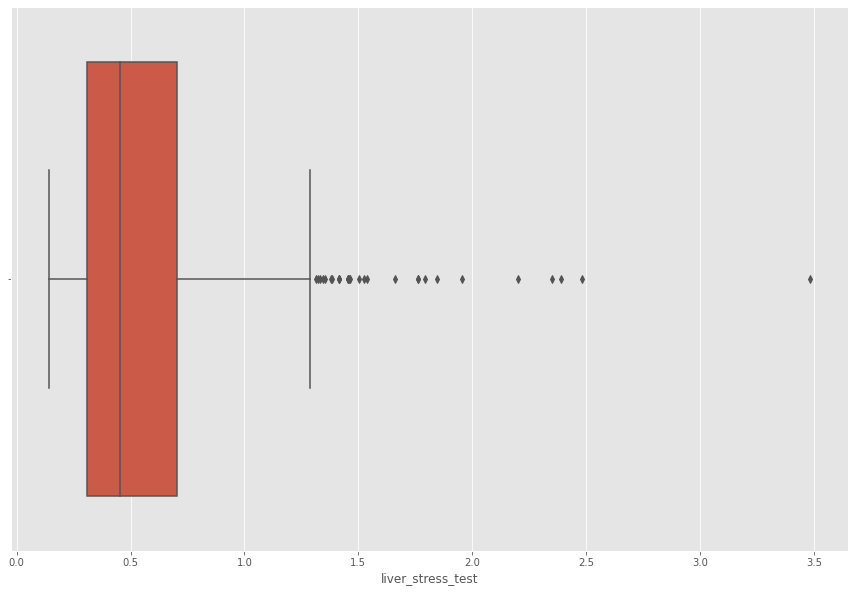

cardio_stress_test
count    763.000000
mean      44.958060
std       29.753022
min        0.000000
25%        0.000000
50%       54.000000
75%       63.000000
max      214.000000
Name: cardio_stress_test, dtype: float64
[  0  55  56  59  53  54  75  41  57  61  77  66  64  43  49  48  78  60
  62  45  58  47  51  46  68  65  79  63  76  67  70  50  72  80  71  74
 186  52  42  84  73  40  37  81  69 160  82  86  44 181 214  38 169  93
 129 164  90]


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


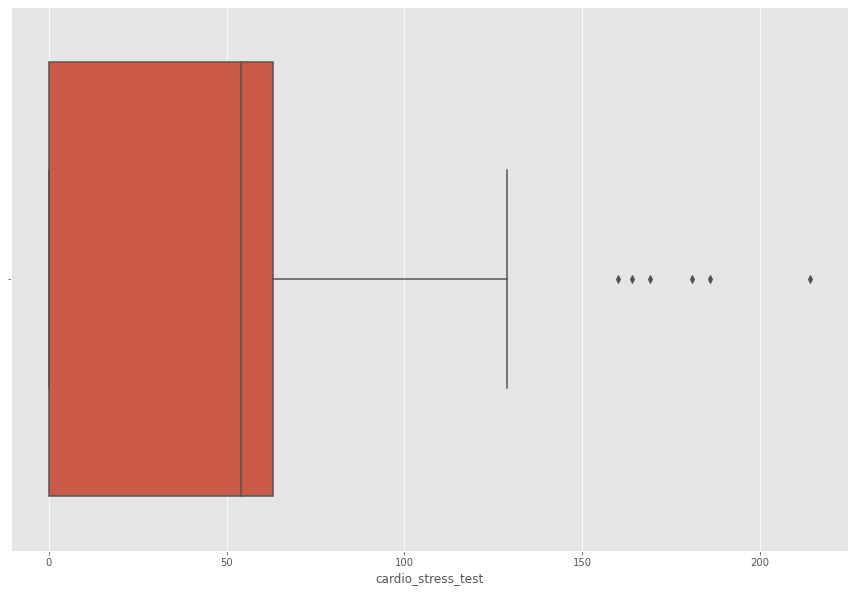

years_smoking
count    763.000000
mean       4.002621
std        3.968378
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       40.000000
Name: years_smoking, dtype: float64
[10  2  7  0  1  4  5  6  9  3  8 14 11 17 13 12 35 36 40 15]


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


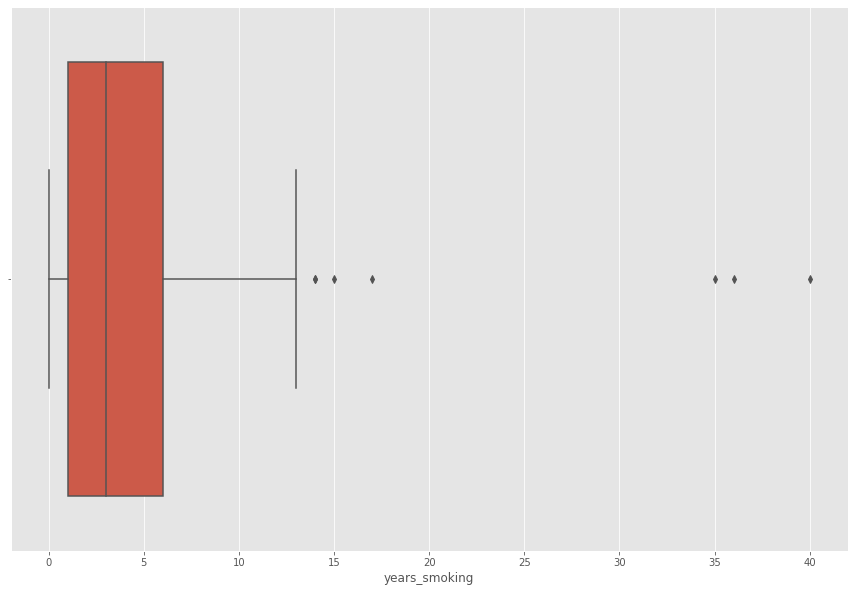

zeta_disease
count    763.000000
mean       0.344692
std        0.475579
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: zeta_disease, dtype: float64
[0 1]


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


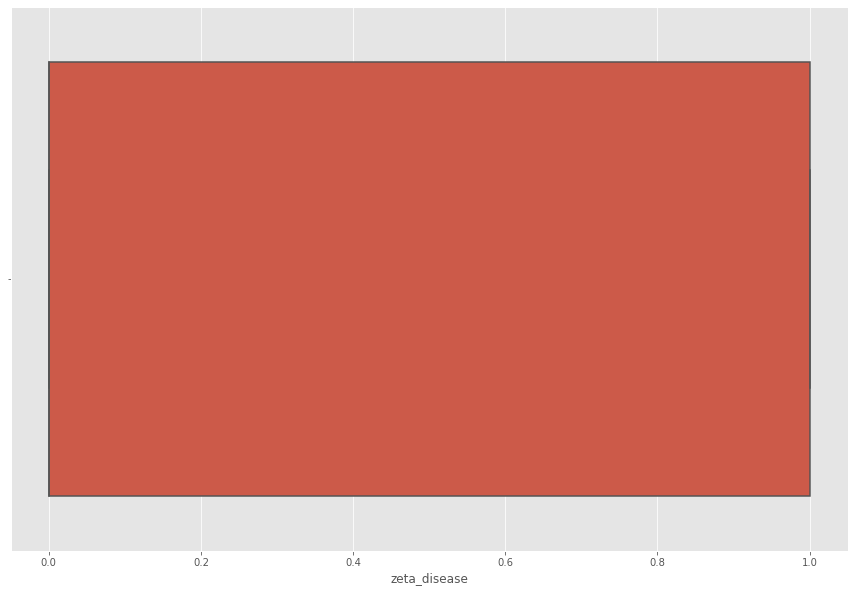

In [5]:
for label in labels:
    print(label)
    print(df[label].describe())
    print(df[label].unique())
    sns.boxplot(df[label])
    plt.show()

In [6]:
df.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [8]:
df_out=df
df_out.to_csv('2021-01-21_zeta-disease_training-data_dsi-take-home-challenge_cleaned2.csv',index=False)